<a href="https://colab.research.google.com/github/rohandawar/hierarchicalAnalysis/blob/main/hierarchical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I am trying to replicate hierarchical analysis on synthatic data

In [1]:
# import Libs
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt


In [2]:
# Create some data for analysis
df = pd.DataFrame({
    "ID": [1,2,3,4,5,6,7,8],
    'Name' : ["john","jane", 'mark', 'emily', 'david', 'sarah', 'kate','luke'],
    "Parent_id": [np.nan, np.nan,1,1,2,2,3,3]
    
})
df.head()

,ID,Name,Parent_id
0,1,john,NaN
1,2,jane,NaN
2,3,mark,1.0
3,4,emily,1.0
4,5,david,2.0


In [3]:
# chekcing nulls
df.isnull().sum()

ID           0
Name         0
Parent_id    2
dtype: int64

In [4]:
# Create a directed Graph
G = nx.DiGraph()

<ipython-input-6-9a61ac1ad165>:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='dot')


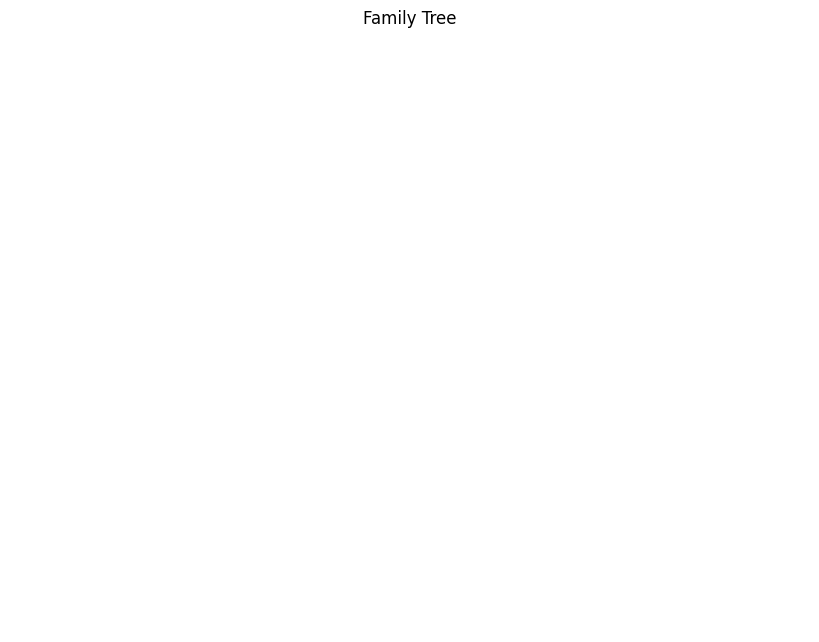

In [6]:
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
plt.figure(figsize=(8, 6))
# nx.draw(G, pos, with_labels=True, arrows=True, node_size=800, font_size=12, font_weight='bold')
nx.draw(G, pos, with_labels=True, arrows=True, node_size=800, font_size=12, font_weight='bold', labels=nx.get_node_attributes(G, 'label'))
plt.title('Family Tree')
plt.axis('off')
plt.show()

In [8]:
# Add nodes to the graph
for _, row in df.iterrows():
    G.add_node(row['ID'], label=row['Name']) 
  

<ipython-input-9-9a61ac1ad165>:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='dot')


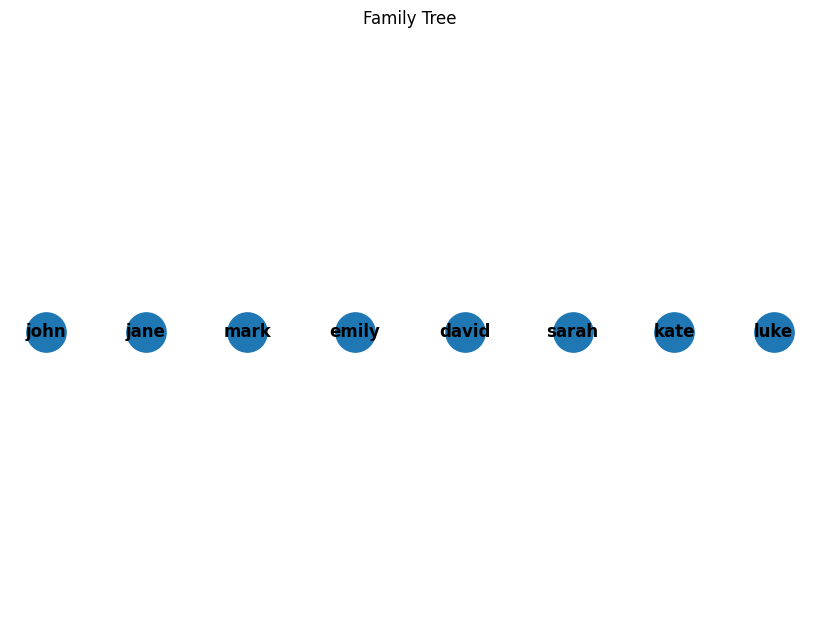

In [9]:
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
plt.figure(figsize=(8, 6))
# nx.draw(G, pos, with_labels=True, arrows=True, node_size=800, font_size=12, font_weight='bold')
nx.draw(G, pos, with_labels=True, arrows=True, node_size=800, font_size=12, font_weight='bold', labels=nx.get_node_attributes(G, 'label'))
plt.title('Family Tree')
plt.axis('off')
plt.show()

In [10]:
# Add edges to the graph to represnt parent-child relationships
for _,row in df.iterrows():
  parent_id = row['Parent_id']
  if pd.notna(parent_id):
    G.add_edge(parent_id, row['ID'])

# Generate the tree layout
pos = nx.nx_pydot.graphviz_layout(G,prog='dot')


<ipython-input-10-dd5d6b6c5c85>:8: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G,prog='dot')


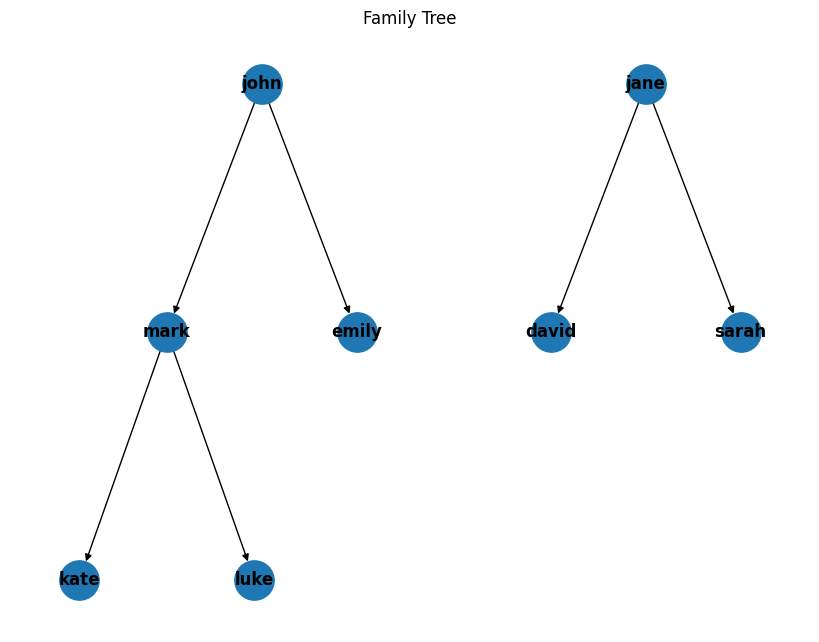

In [11]:
# Plot the tree
plt.figure(figsize=(8, 6))
# nx.draw(G, pos, with_labels=True, arrows=True, node_size=800, font_size=12, font_weight='bold')
nx.draw(G, pos, with_labels=True, arrows=True, node_size=800, font_size=12, font_weight='bold', labels=nx.get_node_attributes(G, 'label'))
plt.title('Family Tree')
plt.axis('off')
plt.show()

<ipython-input-14-ee77e6f3cf76>:12: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog='dot')


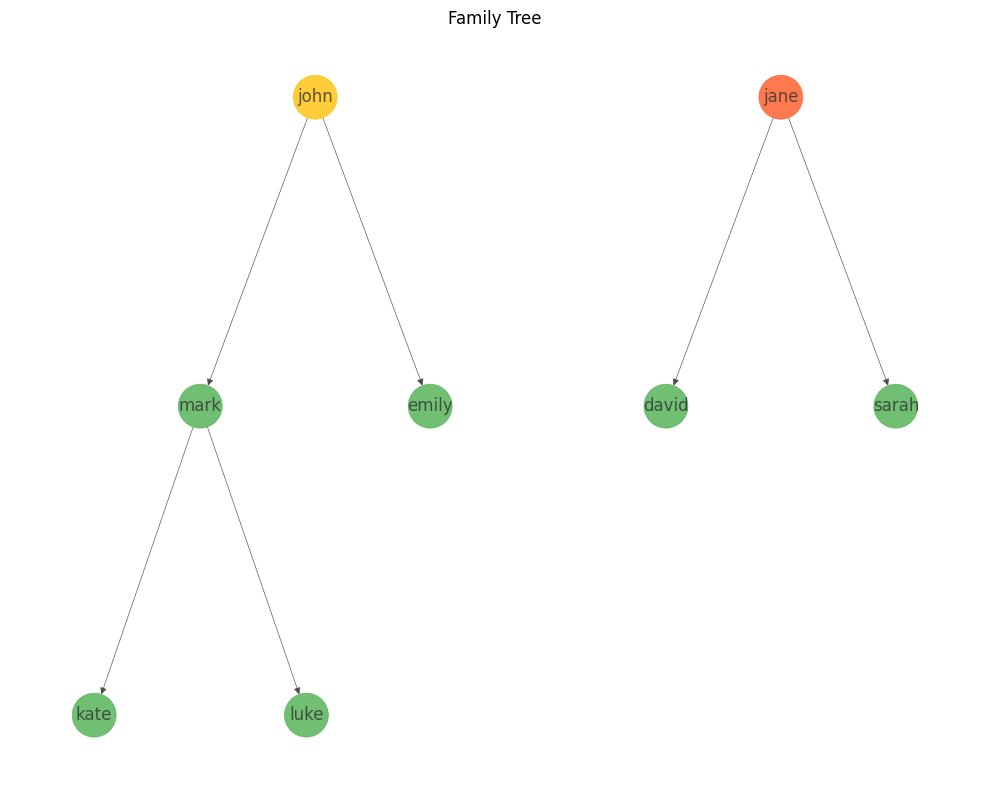

In [14]:
# Add nodes to the graph with names as labels
for _, row in df.iterrows():
    G.add_node(row['ID'], label=row['Name'])

# Add edges to represent parent-child relationships
for _, row in df.iterrows():
    parent_id = row['Parent_id']
    if pd.notna(parent_id):
        G.add_edge(parent_id, row['ID'])

# Generate the tree layout
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')

# Plot the tree with enhanced aesthetics
plt.figure(figsize=(10, 8))

# Customize node and edge colors
node_colors = ['#FFC107' if node == 1 else '#FF5722' if node == 2 else '#4CAF50' for node in G.nodes()]
edge_colors = '#333333'

# Customize node size and shape
node_size = 1000
node_shape = 'o'

# Customize font size and font color
font_size = 12
font_color = '#333333'

nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    node_size=node_size,
    node_shape=node_shape,
    font_size=font_size,
    font_color=font_color,
    linewidths=0.5,
    width=0.5,
    alpha=0.8,labels=nx.get_node_attributes(G, 'label')
)

plt.title('Family Tree')
plt.axis('off')
plt.tight_layout()
plt.show()